## Import libraries

In [1]:
import kagglehub
import shutil
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import dataset from kaggle 

In [2]:


# Downloading from Kagglehub
cached_path = kagglehub.dataset_download("parulpandey/palmer-archipelago-antarctica-penguin-data")
print("Cached path:", cached_path)

# Choosinf my own folder to copy files to
target_folder = r"D:\AD_Lab\datasets\penguins_dataset"

# Creating folder if it doesn't exist
os.makedirs(target_folder, exist_ok=True)

# Copy all files from cache → my desired folder
for file_name in os.listdir(cached_path):
    src = os.path.join(cached_path, file_name)
    dst = os.path.join(target_folder, file_name)
    shutil.copy(src, dst)

print("Dataset copied to:", target_folder)


Cached path: C:\Users\Shubh Agnihotri\.cache\kagglehub\datasets\parulpandey\palmer-archipelago-antarctica-penguin-data\versions\1
Dataset copied to: D:\AD_Lab\datasets\penguins_dataset


## Dataset loading using Pandas, not seaborn


In [3]:


df = pd.read_csv(r"D:\AD_Lab\datasets\penguins_dataset\penguins_size.csv")
print(df.head())
print(df.info())

# sns.set(style="whitegrid", palette="muted", context="notebook") for sns (seaborn) style

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null 

## Plotting the histogram

For basic histogram (Frequency vs Body mass,20 interval size)

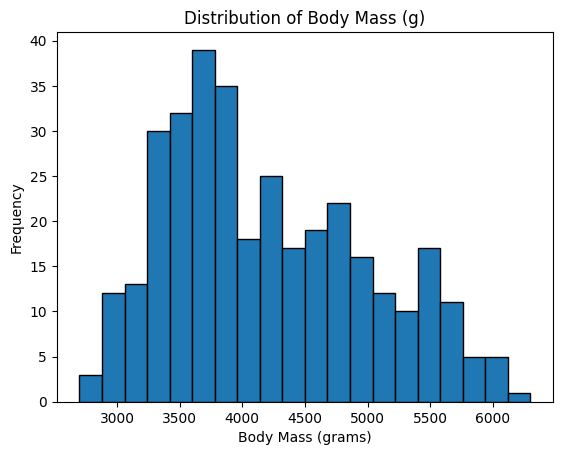

In [4]:
plt.hist(df['body_mass_g'], bins=20, edgecolor='black')
plt.title("Distribution of Body Mass (g)")
plt.xlabel("Body Mass (grams)")
plt.ylabel("Frequency")
plt.show()

For pretty-looking histogram (count vs body mass, 30 interval size)

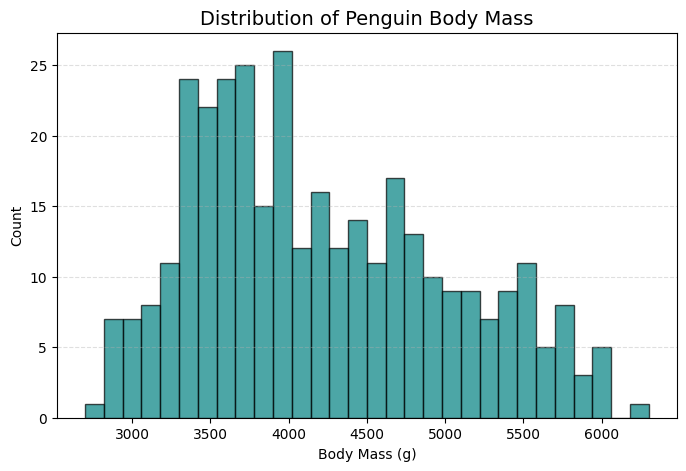

In [5]:

plt.figure(figsize=(8,5))
plt.hist(df['body_mass_g'], bins=30, alpha=0.7, color='teal', edgecolor='black')
plt.title("Distribution of Penguin Body Mass", fontsize=14)
plt.xlabel("Body Mass (g)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


## Creating scatter plots

Example 1:
Relationship between flipper length and body mass

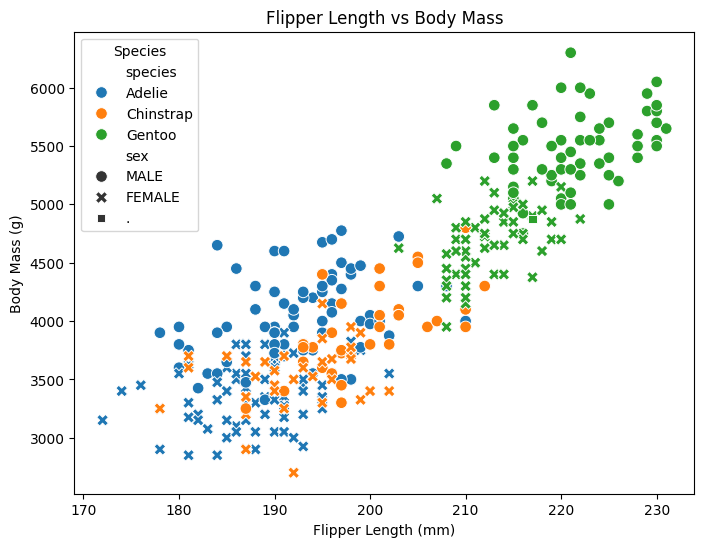

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="species",      # color points by species
    style="sex",        # optional: different markers for male/female
    s=70                # point size
)

plt.title("Flipper Length vs Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.legend(title="Species")
plt.show()

Example 2: Culmen length vs culmen depth

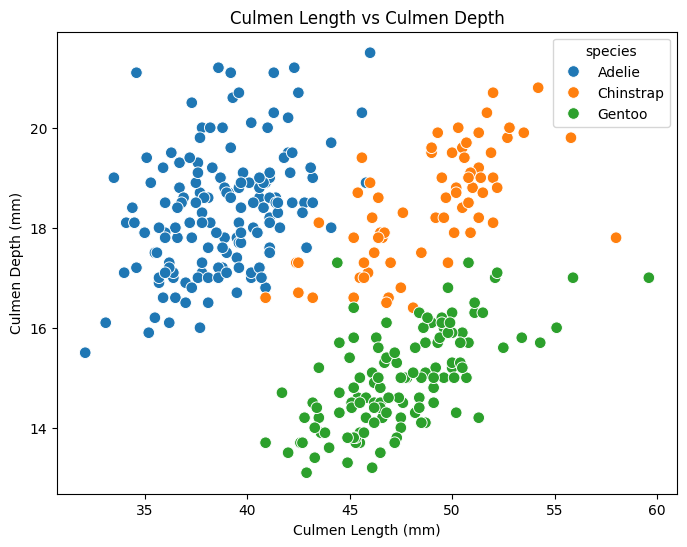

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="culmen_length_mm",
    y="culmen_depth_mm",
    hue="species",
    s=70
)

plt.title("Culmen Length vs Culmen Depth")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.show()


Example 3: Use sex as hue instead of species

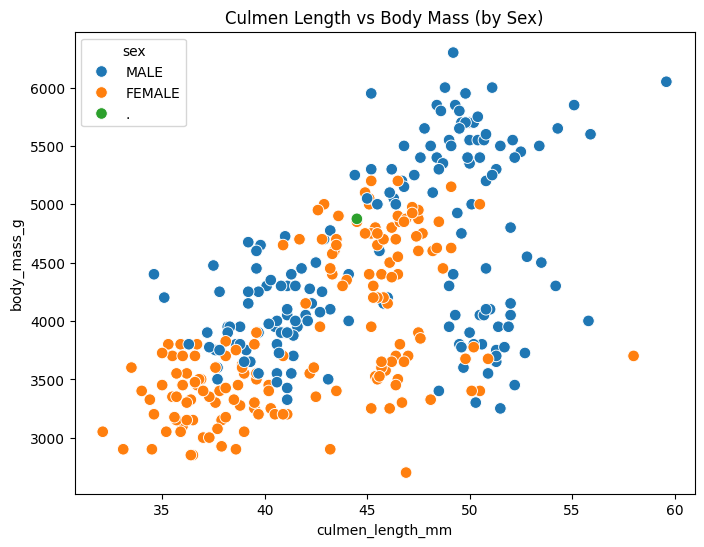

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="culmen_length_mm",
    y="body_mass_g",
    hue="sex",
    s=70
)

plt.title("Culmen Length vs Body Mass (by Sex)")
plt.show()


## Heatmap

Basic and clean heatmap

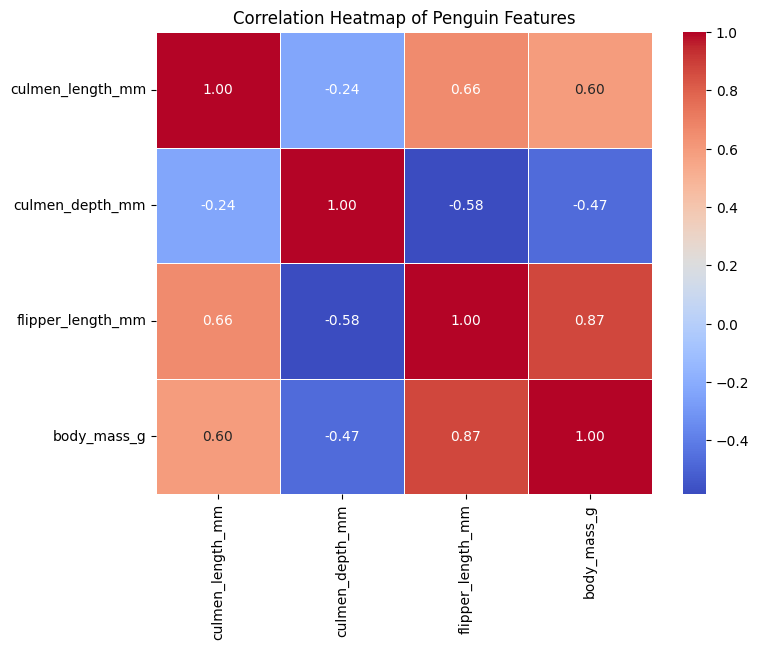

In [9]:
# Selecting only numerical columns
num_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]

# Computing correlation matrix
corr = df[num_cols].corr()

# Plot tingheatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Penguin Features")
plt.show()

Colourful (Lower Triangle only)

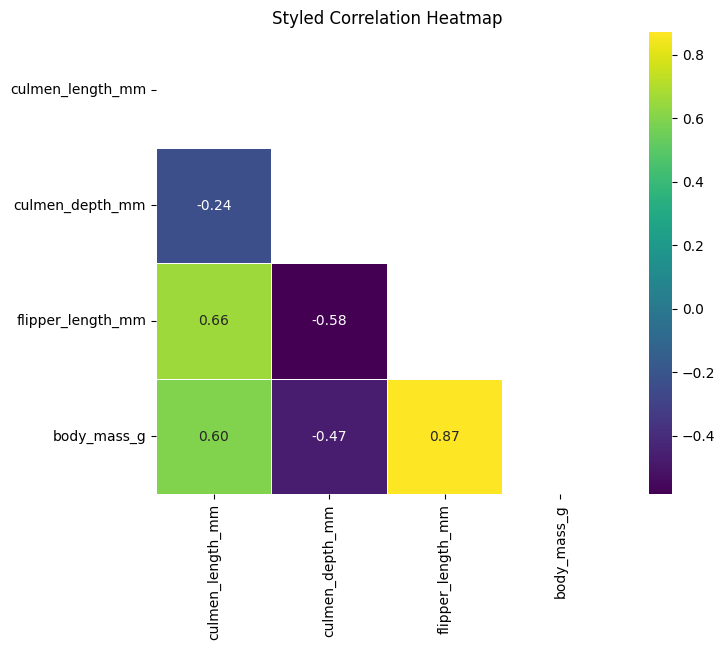

In [10]:


mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="viridis", mask=mask, fmt=".2f",
            linewidths=0.5, square=True)
plt.title("Styled Correlation Heatmap")
plt.show()
